<a href="https://colab.research.google.com/github/Jayesh-m/Data-Science-assigment/blob/main/practical%20exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import files


uploaded = files.upload()

Saving forest.csv to forest (3).csv


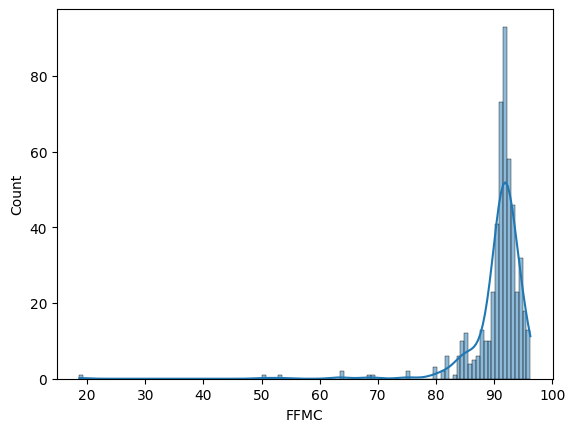

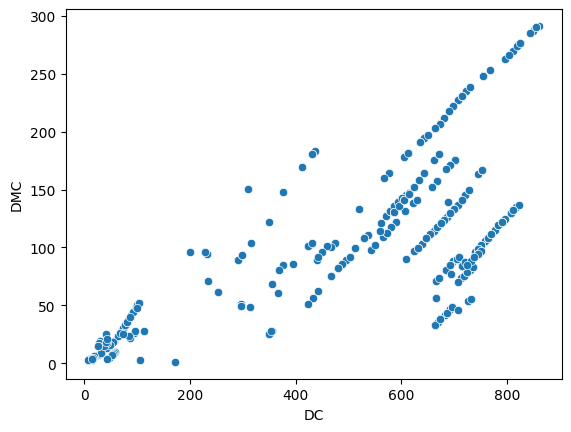

Information Gain Scores:
   Feature  Info_Gain
4    FFMC   0.063059
3     ISI   0.060698
2     DMC   0.014105
5    temp   0.002958
0    area   0.002711
1      DC   0.000000
6      RH   0.000000
7    wind   0.000000
8    rain   0.000000

Fisher Scores:
   Feature  Fisher_Score
1      DC    518.783461
2     DMC    332.940649
4    FFMC    115.300552
6      RH     92.744774
0    area     69.896583
3     ISI     56.395669
5    temp     12.927635
7    wind      2.869457
8    rain      0.153725
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

        high       1.00      1.00      1.00       104

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif, chi2 # Import chi2
from scipy.stats import fisher_exact
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, chi2


df = pd.read_csv("forest.csv")

for column in ['area', 'DC', 'DMC', 'ISI', 'FFMC', 'temp', 'RH', 'wind', 'rain']:
    df[column] = df[column].fillna(df[column].mean())

sns.histplot(df['FFMC'], kde=True)
plt.show()

sns.scatterplot(x='DC', y='DMC', data=df)
plt.show()


y = pd.cut(df['FFMC'], bins=3, labels=['low', 'medium', 'high'])

# Information Gain
info_gain = mutual_info_classif(X, y)
info_gain_scores = pd.DataFrame({'Feature': X.columns, 'Info_Gain': info_gain})
info_gain_scores = info_gain_scores.sort_values(by=['Info_Gain'], ascending=False)
print("Information Gain Scores:\n", info_gain_scores)

# Fisher Score (Chi-squared statistic)
fisher_scores = chi2(X, pd.factorize(y)[0])[0]
fisher_scores_df = pd.DataFrame({'Feature': X.columns, 'Fisher_Score': fisher_scores})
fisher_scores_df = fisher_scores_df.sort_values(by=['Fisher_Score'], ascending=False)
print("\nFisher Scores:\n", fisher_scores_df)


#Classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)